# ES score analysis of datasets generated **before** run_lv_fix

In [1]:
# packages

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

## ES score for different regression regularizers and different averaging options

In [2]:
# get calculated scores for linear regression, and its regularized versions (with cross-validation), also for different averaging options (geometric, arithmetic, and no averaging)

geom_lr_scores = pd.read_csv("mtist_datasets/output_geom/inference_result_infer_from_did_geom_mean/es_scores.csv", index_col=0)
geom_lasso_scores = pd.read_csv("mtist_datasets/output_geom/inference_result_infer_from_did_lasso_cv_geom_mean/es_scores.csv", index_col=0)
geom_ridge_scores = pd.read_csv("mtist_datasets/output_geom/inference_result_infer_from_did_ridge_cv_geom_mean/es_scores.csv", index_col=0)
geom_elasticnet_scores = pd.read_csv("mtist_datasets/output_geom/inference_result_infer_from_did_elasticnet_cv_geom_mean/es_scores.csv", index_col=0)

arithm_lr_scores = pd.read_csv("mtist_datasets/output_arithm/inference_result_infer_from_did_arithm_mean/es_scores.csv", index_col=0)
arithm_lasso_scores = pd.read_csv("mtist_datasets/output_arithm/inference_result_infer_from_did_lasso_cv_arithm_mean/es_scores.csv", index_col=0)
arithm_ridge_scores = pd.read_csv("mtist_datasets/output_arithm/inference_result_infer_from_did_ridge_cv_arithm_mean/es_scores.csv", index_col=0)
arithm_elasticnet_scores = pd.read_csv("mtist_datasets/output_arithm/inference_result_infer_from_did_elasticnet_cv_arithm_mean/es_scores.csv", index_col=0)

nomean_lr_scores = pd.read_csv("mtist_datasets/output_nomean/inference_result_infer_from_did_no_mean/es_scores.csv", index_col=0)
nomean_lasso_scores = pd.read_csv("mtist_datasets/output_nomean/inference_result_infer_from_did_lasso_cv_no_mean/es_scores.csv", index_col=0)
nomean_ridge_scores = pd.read_csv("mtist_datasets/output_nomean/inference_result_infer_from_did_ridge_cv_no_mean/es_scores.csv", index_col=0)
nomean_elasticnet_scores = pd.read_csv("mtist_datasets/output_nomean/inference_result_infer_from_did_elasticnet_cv_no_mean/es_scores.csv", index_col=0)

In [3]:
# get number of species of each dataset and add it to score dataframes

n_sp = []
for i in range(len(geom_lr_scores)):
    n_sp.append(open(f"mtist_datasets/dataset_{i}.csv", "r").readlines()[0].count("species_"))

geom_lr_scores["n_sp"] = n_sp
geom_lasso_scores["n_sp"] = n_sp
geom_ridge_scores["n_sp"] = n_sp
geom_elasticnet_scores["n_sp"] = n_sp

arithm_lr_scores["n_sp"] = n_sp
arithm_lasso_scores["n_sp"] = n_sp
arithm_ridge_scores["n_sp"] = n_sp
arithm_elasticnet_scores["n_sp"] = n_sp

nomean_lr_scores["n_sp"] = n_sp
nomean_lasso_scores["n_sp"] = n_sp
nomean_ridge_scores["n_sp"] = n_sp
nomean_elasticnet_scores["n_sp"] = n_sp

In [4]:
# create lists of dataframes to simplify calls later

geom_score_dfs = [geom_lr_scores, geom_lasso_scores, geom_ridge_scores, geom_elasticnet_scores]
arithm_score_dfs = [arithm_lr_scores, arithm_lasso_scores, arithm_ridge_scores, arithm_elasticnet_scores]
nomean_score_dfs = [nomean_lr_scores, nomean_lasso_scores, nomean_ridge_scores, nomean_elasticnet_scores]
reg_names = ["Linear Regression", "Lasso", "Ridge", "ElasticNet"]

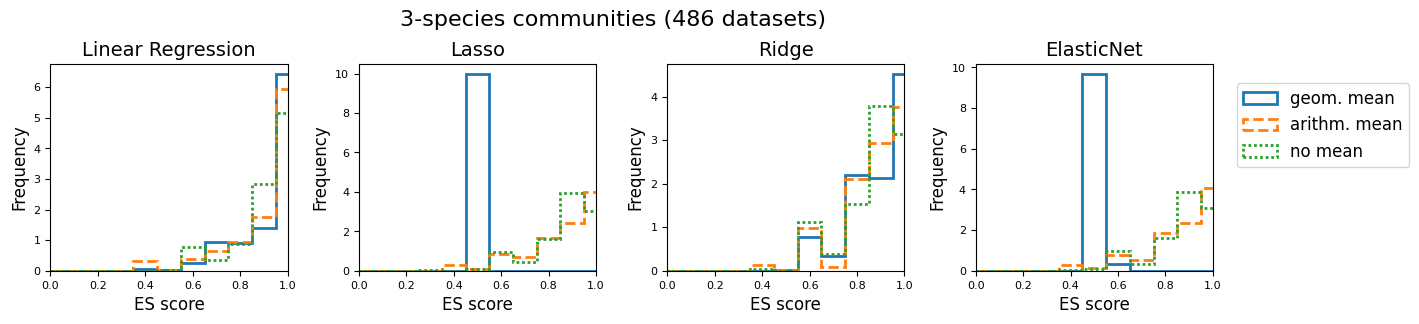

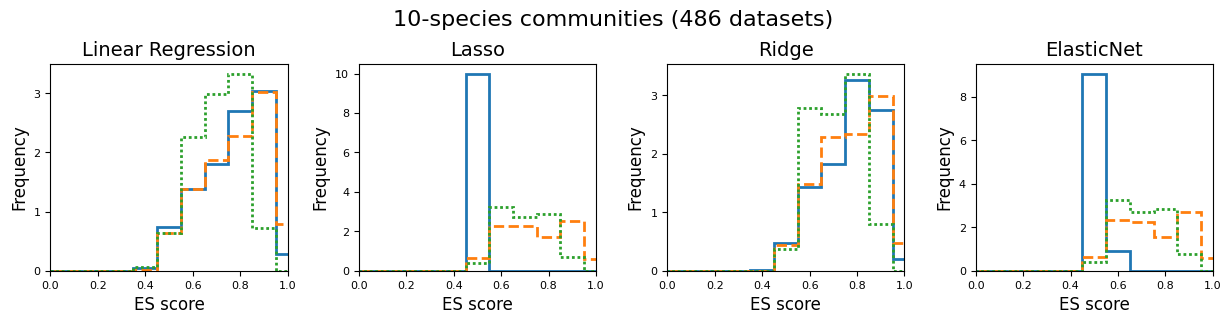

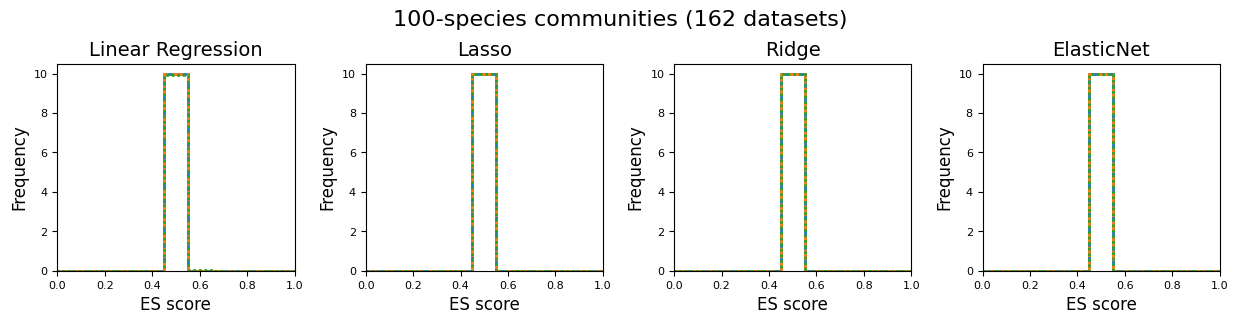

In [12]:
# plotting

bins = np.linspace(-0.05, 1.05, 12)

plt.subplots(1, 4, figsize=(15,3))
for i in range(len(geom_score_dfs)):
    geom_df = geom_score_dfs[i]
    arithm_df = arithm_score_dfs[i]
    plt.subplot(1, 4, i+1)
    if i==3:
        plt.hist(geom_df[geom_df.n_sp==3].raw, bins=bins, histtype="step", lw=2, density=True, label="geom. mean")
        plt.hist(arithm_df[arithm_df.n_sp==3].raw, bins=bins, histtype="step", lw=2, ls="--", density=True, label="arithm. mean")
        nomean_df = nomean_score_dfs[i]
        plt.hist(nomean_df[nomean_df.n_sp==3].raw, bins=bins, histtype="step", lw=2, ls=(0, (1, 1)), density=True, label="no mean")
    else:
        plt.hist(geom_df[geom_df.n_sp==3].raw, bins=bins, histtype="step", lw=2, density=True)
        plt.hist(arithm_df[arithm_df.n_sp==3].raw, bins=bins, histtype="step", lw=2, ls="--", density=True)
        nomean_df = nomean_score_dfs[i]
        plt.hist(nomean_df[nomean_df.n_sp==3].raw, bins=bins, histtype="step", lw=2, ls=(0, (1, 1)), density=True)
    plt.xlim(0, 1)
    plt.xlabel("ES score", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.title(reg_names[i], fontsize=14)
    # plt.yscale("log")
plt.suptitle(f"3-species communities ({len(geom_df[geom_df.n_sp==3])} datasets)", fontsize=16)
plt.subplots_adjust(top=0.8, wspace=0.3)
plt.legend(loc=(1.1,0.5), fontsize=12)
plt.show()

plt.subplots(1, 4, figsize=(15,3))
for i in range(len(geom_score_dfs)):
    geom_df = geom_score_dfs[i]
    arithm_df = arithm_score_dfs[i]
    plt.subplot(1, 4, i+1)
    plt.hist(geom_df[geom_df.n_sp==10].raw, bins=bins, histtype="step", lw=2, density=True)
    plt.hist(arithm_df[arithm_df.n_sp==10].raw, bins=bins, histtype="step", lw=2, ls="--", density=True)
    nomean_df = nomean_score_dfs[i]
    plt.hist(nomean_df[nomean_df.n_sp==10].raw, bins=bins, histtype="step", lw=2, ls=(0, (1, 1)), density=True)
    plt.xlim(0, 1)
    plt.xlabel("ES score", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.title(reg_names[i], fontsize=14)
    # plt.yscale("log")
plt.suptitle(f"10-species communities ({len(geom_df[geom_df.n_sp==10])} datasets)", fontsize=16)
plt.subplots_adjust(top=0.8, wspace=0.3)
plt.show()

plt.subplots(1, 4, figsize=(15,3))
for i in range(len(geom_score_dfs)):
    geom_df = geom_score_dfs[i]
    arithm_df = arithm_score_dfs[i]
    plt.subplot(1, 4, i+1)
    plt.hist(geom_df[geom_df.n_sp==100].raw, bins=bins, histtype="step", lw=2, density=True)
    plt.hist(arithm_df[arithm_df.n_sp==100].raw, bins=bins, histtype="step", lw=2, ls="--", density=True)
    nomean_df = nomean_score_dfs[i]
    plt.hist(nomean_df[nomean_df.n_sp==100].raw, bins=bins, histtype="step", lw=2, ls=(0, (1, 1)), density=True)
    plt.xlim(0, 1)
    plt.xlabel("ES score", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.title(reg_names[i], fontsize=14)
    # plt.yscale("log")
plt.suptitle(f"100-species communities ({len(geom_df[geom_df.n_sp==100])} datasets)", fontsize=16)
plt.subplots_adjust(top=0.8, wspace=0.3)
plt.show()

No very strong difference between regressions with different averaging, but for 10 species one can see that no averaging is a bit worse than either geometric or arithmetic averaging.

## Comparison of results with and without cross validation (only for geometric mean)

In [6]:
# get ES scores

geom_lr_scores = pd.read_csv("mtist_datasets/output_geom/inference_result_infer_from_did_geom_mean/es_scores.csv", index_col=0)
geom_lasso_scores = pd.read_csv("mtist_datasets/output_geom/inference_result_infer_from_did_lasso_geom_mean/es_scores.csv", index_col=0)
geom_ridge_scores = pd.read_csv("mtist_datasets/output_geom/inference_result_infer_from_did_ridge_geom_mean/es_scores.csv", index_col=0)
geom_elasticnet_scores = pd.read_csv("mtist_datasets/output_geom/inference_result_infer_from_did_elasticnet_geom_mean/es_scores.csv", index_col=0)

geom_lasso_cv_scores = pd.read_csv("mtist_datasets/output_geom/inference_result_infer_from_did_lasso_cv_geom_mean/es_scores.csv", index_col=0)
geom_ridge_cv_scores = pd.read_csv("mtist_datasets/output_geom/inference_result_infer_from_did_ridge_cv_geom_mean/es_scores.csv", index_col=0)
geom_elasticnet_cv_scores = pd.read_csv("mtist_datasets/output_geom/inference_result_infer_from_did_elasticnet_cv_geom_mean/es_scores.csv", index_col=0)

In [7]:
# add number of species to score dataframes

geom_lr_scores["n_sp"] = n_sp
geom_lasso_scores["n_sp"] = n_sp
geom_ridge_scores["n_sp"] = n_sp
geom_elasticnet_scores["n_sp"] = n_sp

geom_lasso_cv_scores["n_sp"] = n_sp
geom_ridge_cv_scores["n_sp"] = n_sp
geom_elasticnet_cv_scores["n_sp"] = n_sp

In [8]:
# create lists of dataframes to facilitate calls

geom_score_dfs = [geom_lr_scores, geom_lasso_scores, geom_ridge_scores, geom_elasticnet_scores]
geom_cv_score_dfs = [geom_lasso_cv_scores, geom_ridge_cv_scores, geom_elasticnet_cv_scores]
reg_names = ["Linear Regression", "Lasso", "Ridge", "ElasticNet"]

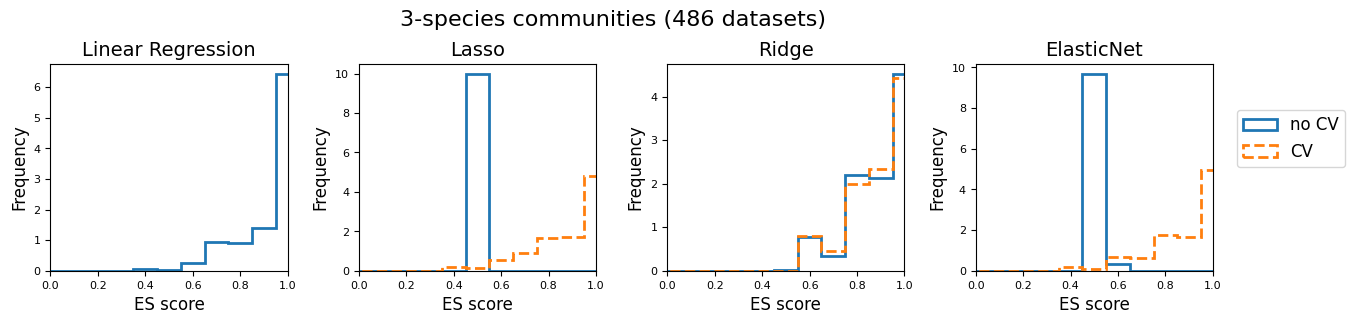

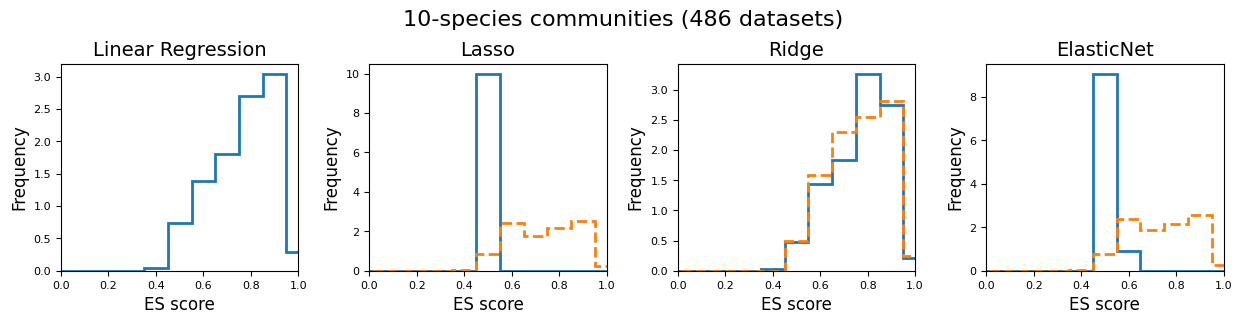

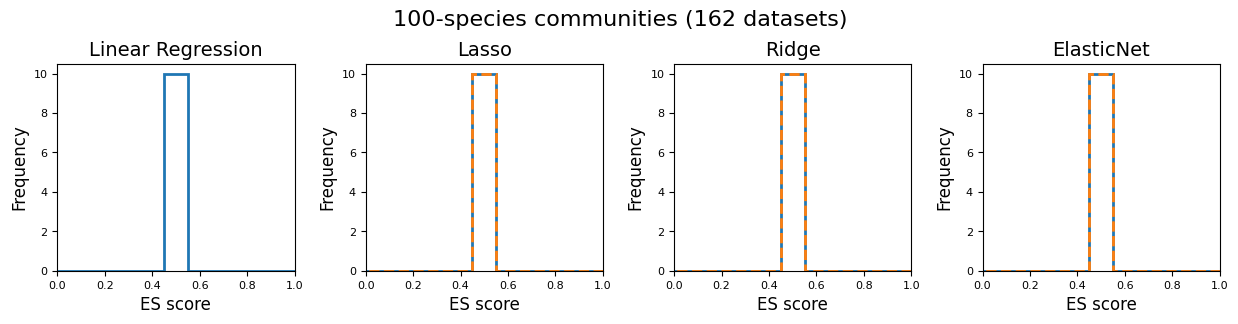

In [9]:
# plotting

bins = np.linspace(-0.05, 1.05, 12)

plt.subplots(1, 4, figsize=(15,3))
for i in range(len(geom_score_dfs)):
    geom_df = geom_score_dfs[i]
    plt.subplot(1, 4, i+1)
    if i==3:
        plt.hist(geom_df[geom_df.n_sp==3].raw, bins=bins, histtype="step", lw=2, density=True, label="no CV")
    else:
        plt.hist(geom_df[geom_df.n_sp==3].raw, bins=bins, histtype="step", lw=2, density=True)
    if i>0:
        geom_cv_df = geom_cv_score_dfs[i-1]
        if i==3:
            plt.hist(geom_cv_df[geom_cv_df.n_sp==3].raw, bins=bins, histtype="step", lw=2, ls="--", density=True, label="CV")
        else:
            plt.hist(geom_cv_df[geom_cv_df.n_sp==3].raw, bins=bins, histtype="step", lw=2, ls="--", density=True)
    plt.xlim(0, 1)
    plt.xlabel("ES score", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.title(reg_names[i], fontsize=14)
    # plt.yscale("log")
plt.suptitle(f"3-species communities ({len(geom_df[geom_df.n_sp==3])} datasets)", fontsize=16)
plt.subplots_adjust(top=0.8, wspace=0.3)
plt.legend(loc=(1.1,0.5), fontsize=12)
plt.show()

plt.subplots(1, 4, figsize=(15,3))
for i in range(len(geom_score_dfs)):
    geom_df = geom_score_dfs[i]
    plt.subplot(1, 4, i+1)
    plt.hist(geom_df[geom_df.n_sp==10].raw, bins=bins, histtype="step", lw=2, density=True)
    if i>0:
        geom_cv_df = geom_cv_score_dfs[i-1]
        plt.hist(geom_cv_df[geom_cv_df.n_sp==10].raw, bins=bins, histtype="step", lw=2, ls="--", density=True)
    plt.xlim(0, 1)
    plt.xlabel("ES score", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.title(reg_names[i], fontsize=14)
    # plt.yscale("log")
plt.suptitle(f"10-species communities ({len(geom_df[geom_df.n_sp==10])} datasets)", fontsize=16)
plt.subplots_adjust(top=0.8, wspace=0.3)
plt.show()

plt.subplots(1, 4, figsize=(15,3))
for i in range(len(geom_score_dfs)):
    geom_df = geom_score_dfs[i]
    plt.subplot(1, 4, i+1)
    plt.hist(geom_df[geom_df.n_sp==100].raw, bins=bins, histtype="step", lw=2, density=True)
    if i>0:
        geom_cv_df = geom_cv_score_dfs[i-1]
        plt.hist(geom_cv_df[geom_cv_df.n_sp==100].raw, bins=bins, histtype="step", lw=2, ls="--", density=True)
    plt.xlim(0, 1)
    plt.xlabel("ES score", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.title(reg_names[i], fontsize=14)
    # plt.yscale("log")
plt.suptitle(f"100-species communities ({len(geom_df[geom_df.n_sp==100])} datasets)", fontsize=16)
plt.subplots_adjust(top=0.8, wspace=0.3)
plt.show()

## Comparison between results of LinearRegression and RidgeCV

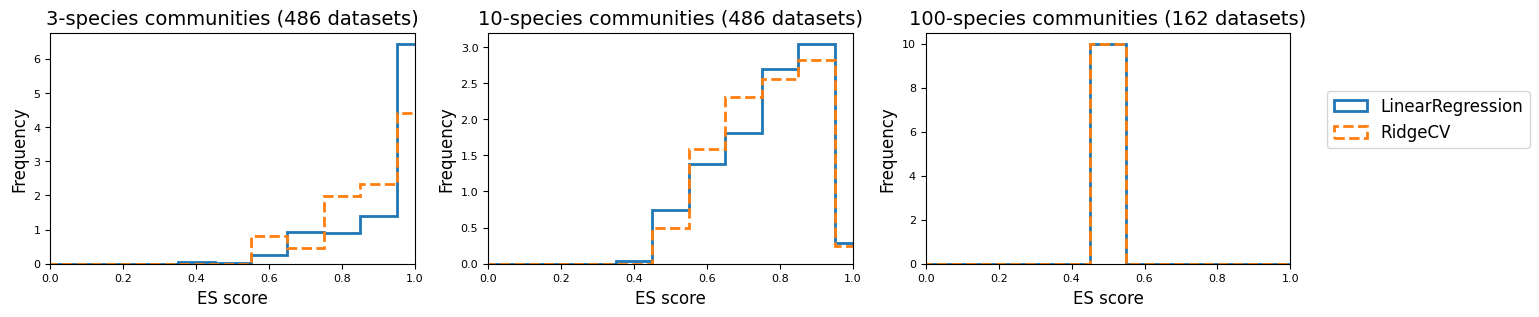

In [10]:
# plotting

bins = np.linspace(-0.05, 1.05, 12)

plt.subplots(1, 3, figsize=(16,3))
plt.subplot(1, 3, 1)
geom_df = geom_score_dfs[0]
geom_cv_df = geom_cv_score_dfs[1]
plt.hist(geom_df[geom_df.n_sp==3].raw, bins=bins, histtype="step", lw=2, density=True)
plt.hist(geom_cv_df[geom_cv_df.n_sp==3].raw, bins=bins, histtype="step", lw=2, ls="--", density=True)
plt.xlim(0, 1)
plt.xlabel("ES score", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.title(f"3-species communities ({len(geom_df[geom_df.n_sp==3])} datasets)", fontsize=14)
# plt.yscale("log")

plt.subplot(1, 3, 2)
geom_df = geom_score_dfs[0]
plt.hist(geom_df[geom_df.n_sp==10].raw, bins=bins, histtype="step", lw=2, density=True)
geom_cv_df = geom_cv_score_dfs[1]
plt.hist(geom_cv_df[geom_cv_df.n_sp==10].raw, bins=bins, histtype="step", lw=2, ls="--", density=True)
plt.xlim(0, 1)
plt.xlabel("ES score", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.title(f"10-species communities ({len(geom_df[geom_df.n_sp==10])} datasets)", fontsize=14)
# plt.yscale("log")

plt.subplot(1, 3, 3)
geom_df = geom_score_dfs[0]
plt.hist(geom_df[geom_df.n_sp==100].raw, bins=bins, histtype="step", lw=2, density=True, label="LinearRegression")
geom_cv_df = geom_cv_score_dfs[1]
plt.hist(geom_cv_df[geom_cv_df.n_sp==100].raw, bins=bins, histtype="step", lw=2, ls="--", density=True, label="RidgeCV")
plt.xlim(0, 1)
plt.xlabel("ES score", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.title(f"100-species communities ({len(geom_df[geom_df.n_sp==100])} datasets)", fontsize=14)
# plt.yscale("log")
plt.legend(loc=(1.1,0.5), fontsize=12)
plt.show()

## Summary: mean and standard deviation of ES scores obtained with different regularizations, with and without cross-validation, for geometric averaging

In [11]:
print("Mean +/- StD ES score:\n")
print(f"========== 3-species communities ==========")
print(f"LR ES = {geom_df[geom_df.n_sp==3].raw.mean():.5f} +/- {geom_df[geom_df.n_sp==3].raw.std():.5f},")
print(f"Lasso ES = {geom_lasso_scores[geom_lasso_scores.n_sp==3].raw.mean():.5f} +/- {geom_lasso_scores[geom_lasso_scores.n_sp==3].raw.std():.5f}; LassoCV ES = {geom_lasso_cv_scores[geom_lasso_cv_scores.n_sp==3].raw.mean():.5f} +/- {geom_lasso_cv_scores[geom_lasso_cv_scores.n_sp==3].raw.std():.5f},")
print(f"Ridge ES = {geom_df[geom_df.n_sp==3].raw.mean():.5f} +/- {geom_df[geom_df.n_sp==3].raw.std():.5f}; RidgeCV ES = {geom_cv_df[geom_cv_df.n_sp==3].raw.mean():.5f} +/- {geom_cv_df[geom_cv_df.n_sp==3].raw.std():.5f}.")
print(f"\n========== 10-species communities ==========")
print(f"LR ES = {geom_df[geom_df.n_sp==10].raw.mean():.5f} +/- {geom_df[geom_df.n_sp==10].raw.std():.5f},")
print(f"Lasso ES = {geom_lasso_scores[geom_lasso_scores.n_sp==10].raw.mean():.5f} +/- {geom_lasso_scores[geom_lasso_scores.n_sp==10].raw.std():.5f}; LassoCV ES = {geom_lasso_cv_scores[geom_lasso_cv_scores.n_sp==10].raw.mean():.5f} +/- {geom_lasso_cv_scores[geom_lasso_cv_scores.n_sp==10].raw.std():.5f},")
print(f"Ridge ES = {geom_df[geom_df.n_sp==10].raw.mean():.5f} +/- {geom_df[geom_df.n_sp==10].raw.std():.5f}; RidgeCV ES = {geom_cv_df[geom_cv_df.n_sp==10].raw.mean():.5f} +/- {geom_cv_df[geom_cv_df.n_sp==10].raw.std():.5f}")
print(f"\n========== 100-species communities ==========")
print(f"LR ES = {geom_df[geom_df.n_sp==100].raw.mean():.5f} +/- {geom_df[geom_df.n_sp==100].raw.mean():.5f},")
print(f"Lasso ES = {geom_lasso_scores[geom_lasso_scores.n_sp==100].raw.mean():.5f} +/- {geom_lasso_scores[geom_lasso_scores.n_sp==100].raw.std():.5f}; LassoCV ES = {geom_lasso_cv_scores[geom_lasso_cv_scores.n_sp==100].raw.mean():.5f} +/- {geom_lasso_cv_scores[geom_lasso_cv_scores.n_sp==100].raw.std():.5f},")
print(f"Ridge ES = {geom_df[geom_df.n_sp==100].raw.mean():.5f} +/- {geom_df[geom_df.n_sp==100].raw.std():.5f}; RidgeCV ES = {geom_cv_df[geom_cv_df.n_sp==100].raw.mean():.5f} +/- {geom_cv_df[geom_cv_df.n_sp==100].raw.std():.5f}.")

Mean +/- StD ES score:

========== 3-species communities ==========
LR ES = 0.91744 +/- 0.13041,
Lasso ES = 0.50000 +/- 0.00000; LassoCV ES = 0.88560 +/- 0.14829,
Ridge ES = 0.91744 +/- 0.13041; RidgeCV ES = 0.87902 +/- 0.13575.

========== 10-species communities ==========
LR ES = 0.76964 +/- 0.13474,
Lasso ES = 0.50218 +/- 0.00570; LassoCV ES = 0.73783 +/- 0.13472,
Ridge ES = 0.76964 +/- 0.13474; RidgeCV ES = 0.76629 +/- 0.12270

========== 100-species communities ==========
LR ES = 0.50713 +/- 0.50713,
Lasso ES = 0.50000 +/- 0.00000; LassoCV ES = 0.50860 +/- 0.00715,
Ridge ES = 0.50713 +/- 0.01065; RidgeCV ES = 0.51542 +/- 0.00995.
